In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
plt.rcParams['figure.figsize']=(10.0,6.0)

In [2]:
x_target=np.concatenate((np.zeros(100),np.linspace(0,3,100)))
y_target=np.concatenate((np.linspace(0,3,100),np.full((100),3)))
x_pursuit=np.zeros(200)
y_pursuit=np.zeros(200)
time=np.linspace(0,1,200)
dt=time[1]-time[0]
print("Delta t is "+str(dt))

Delta t is 0.00502512562814


In [3]:
alpha=0.4
speed=0.05/dt

In [4]:
lines=list()
for ind in range(1,200):
  target_index=min(ind+int(alpha/dt),199)
  lines.append([(x_pursuit[ind-1],y_pursuit[ind-1]),(x_target[target_index],y_target[target_index])])
  delta_x=x_target[target_index]-x_pursuit[ind-1]
  delta_y=y_target[target_index]-y_pursuit[ind-1]
  magnitude=np.sqrt(delta_x*delta_x+delta_y*delta_y)
  delta_x/=magnitude
  delta_y/=magnitude
  x_pursuit[ind]=x_pursuit[ind-1]+speed*dt*delta_x
  y_pursuit[ind]=y_pursuit[ind-1]+speed*dt*delta_y

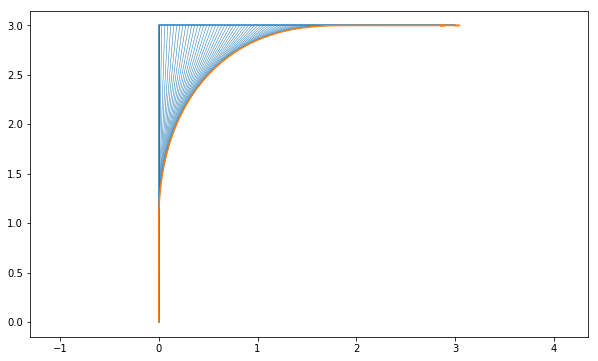

In [5]:
plt.plot(x_target,y_target,x_pursuit,y_pursuit)
lc=mc.LineCollection(lines,lw=0.5)
plt.axes().set_aspect('equal', 'datalim')
plt.axes().add_collection(lc)
plt.show()